In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input, VGG16
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D
from sklearn.model_selection import train_test_split

def load_images_from_directory(directory, target_size=(32, 32)):
    # Load images and their labels from a directory
    images, labels = [], []
    for label_dir in os.listdir(directory):
        label_path = os.path.join(directory, label_dir)
        if os.path.isdir(label_path):
            for file in os.listdir(label_path):
                img_path = os.path.join(label_path, file)
                image = load_img(img_path, target_size=target_size)
                image = img_to_array(image)
                images.append(image)
                labels.append(label_dir)
    return np.array(images), np.array(labels)

def preprocess_labels(labels):
    # One-Hot encode the labels
    encoder = OneHotEncoder(sparse_output=False)
    labels_encoded = encoder.fit_transform(labels.reshape(-1, 1))
    return labels_encoded, encoder

def build_vgg16_model(input_shape, num_classes):
    # Build and compile a VGG16-based model
    model = Sequential()
    model.add(Conv2D(3, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))

    vgg_base = VGG16(weights='imagenet', include_top=False)
    for layer in vgg_base.layers:
        layer.trainable = False
    model.add(vgg_base)
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def plot_training_history(history):
    # Plot loss and accuracy curves during training
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()


In [2]:
if __name__ == "__main__":
    # Define paths
    train_dir = 'dataset_9010/dataset_9010/malimg_dataset/train'
    validation_dir = 'dataset_9010/dataset_9010/malimg_dataset/validation'

    # Load and preprocess the data
    X_train, y_train = load_images_from_directory(train_dir)
    X_test, y_test = load_images_from_directory(validation_dir)

    X_train = preprocess_input(X_train)
    X_test = preprocess_input(X_test)

In [3]:
    y_train, encoder = preprocess_labels(y_train)
    y_test = encoder.transform(y_test.reshape(-1, 1))

    # Build the model
    model = build_vgg16_model(input_shape=X_train.shape[1:], num_classes=y_train.shape[1])

c:\Users\Utilisateur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
    # Train the model
    batch_size = 20
    epochs = 20
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    # Save the model
    model.save('malimg_model.h5')

Epoch 1/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 35s 79ms/step - accuracy: 0.5262 - loss: 3.2704 - val_accuracy: 0.6267 - val_loss: 1.1560
Epoch 2/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - accuracy: 0.7374 - loss: 0.7831 - val_accuracy: 0.7102 - val_loss: 0.8881
Epoch 3/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 33s 78ms/step - accuracy: 0.7672 - loss: 0.6250 - val_accuracy: 0.7476 - val_loss: 0.7656
Epoch 4/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 30s 71ms/step - accuracy: 0.7845 - loss: 0.5687 - val_accuracy: 0.7615 - val_loss: 0.6757
Epoch 5/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 34s 80ms/step - accuracy: 0.7994 - loss: 0.5143 - val_accuracy: 0.7807 - val_loss: 0.6790
Epoch 6/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - accuracy: 0.8035 - loss: 0.5079 - val_accuracy: 0.7914 - val_loss: 0.6530
Epoch 7/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 29s 70ms/step - accuracy: 0.8047 - loss: 0.4921 - val_accuracy: 0.7861 - val_loss: 0.5908
Epoch 8/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 30s 72ms/step - accuracy: 0.8113 - loss: 0.4754 - 

Test Loss: 0.5893, Test Accuracy: 0.8064


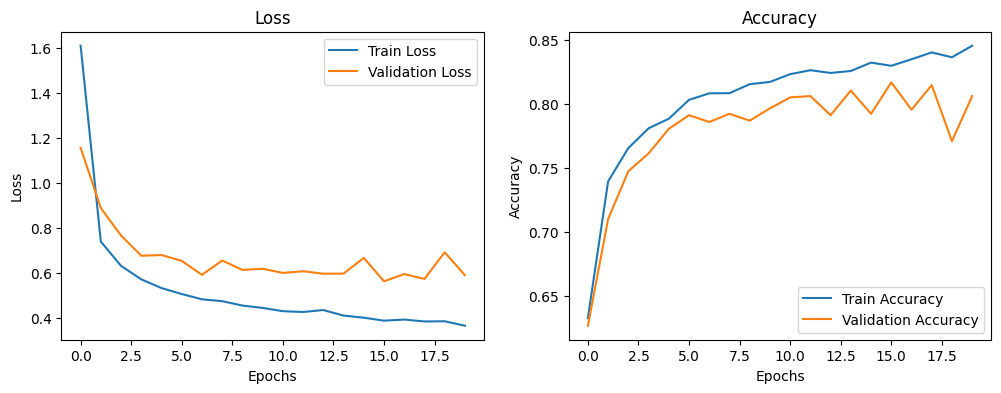

In [5]:
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Plot training history
    plot_training_history(history)